### Sentiment & Similar NLP Analysis
#### Rick Gosalvez, Spring 2020

# Critic Movie Reviews

Source: imdb.com <br>
Parasite Movie - Critic Reviews: www.imdb.com/title/tt6751668/externalreviews?ref_=tt_ov_rt <br>
Joker Movie - Critic Reviews: www.imdb.com/title/tt7286456/externalreviews?ref_=tt_ov_rt

In [12]:
import glob

parasite_rev = {}        # create global dictionary
joker_rev = {}

In [13]:
# get filenames in txt subdirectory
file = glob.glob("*/Joker/*.txt", recursive=True)
print(f'Num. Files Analyzed: {len(file)}')

count = 1
num_files = len(file)

for i in file:
    print(i)

Num. Files Analyzed: 10
txt/Joker/LA_Weekly_Negative.txt
txt/Joker/National_Reviewer_Positive.txt
txt/Joker/1001_Movies_Positive.txt
txt/Joker/Reel_Views_Positive.txt
txt/Joker/Roger_Ebert_Negative.txt
txt/Joker/HuffPost_Negative.txt
txt/Joker/NY_Times_Negative.txt
txt/Joker/SF_Examiner_Positive.txt
txt/Joker/Austin_Chronicle_Negative.txt
txt/Joker/Sight_Sound_Positive.txt


# Normalized Popularity Score to a Comparable Rating System

Conduct sentiment analysis on every review; use __popularity score__ to create __common rating system__ per below: <br> 
-1 to 0 Negative <br> 
0 Neutral <br>
0 to 1 Positive

In [14]:
from textblob import TextBlob
import re

review_dict = {}
crit_dict = {}
review = ''

for i in file:
    movie = re.search(r'/(\w+)[^/]', i).group().strip()     # movie name for text extraction
    critic = re.search(r'[^/](\w+)_', i).group().strip()    # critic name for text extraction
    critic_rating = re.search(r'_([PN][oe][gsu]\w+)\.', i).group().strip()   # critic name for text extraction
    movie = movie.replace('/','')
    critic = critic.replace('_','')
    critic_rating = critic_rating.replace('_',' ').strip()
    critic_rating = critic_rating.replace('.','')
    #print(critic_rating)
    
    with open(i,'r') as text:
        review = text.read()                               # get review
        blob = TextBlob(review)                            # prep for Textblob sentiment analysis
        pop = str(blob.sentiment)                          # get sentiment analysis and convert to string for manipulation
        sen = re.findall('polarity=(.*),\s', pop)          # extract popularity score
        for iii in sen:
            sen = float(iii)                               # convert to float
            
            if sen <= 0:
                sen_assess = 'Negative'
                pred = 0
            elif sen >= 0:
                sen_assess = 'Positive'
                pred = 1
            elif sen == 0:
                sen_assess = 'Neutral'
                pred = 0
                
            if critic_rating == 'Negative':
                expct = 0
            elif critic_rating == 'Positive':
                expct = 1
            elif critic_rating == 'Neutral':
                expct = 0
            
            if sen_assess == critic_rating:
                match = 'SUCCESS'
                pred_success = 1
            else:
                match = 'FAIL'
                pred_success = 0
            
            review_dict[count] = {                         # create dictionary
                movie : {
                    'Critic' : critic,
                    'Pop_Score' : sen,
                    'Sen_Rating' : sen_assess,
                    'Critic_Rating' : critic_rating, 
                    'NLP_Success' : match,
                    'Pred_Success' : pred_success,
                    'Predicted' : pred,
                    'Expected' : expct,
                    #'Review' : review
                }
            }
        if count < num_files:
            count +=1
        else:
            count = 1

In [15]:
movie_list     = []
pred_s_list    = []
predicted_list = []
expct_list     = []

for k,v in review_dict.items():
    for k2, v2 in v.items():                
        print(k2)                        # print movie name
        movie_list.append(k2)
        print(movie_list)
        for k3, v3 in v2.items():
            print(f'{k3} : {v3}')        # print nested pairs to expose individual critic reviews
            if k3 == 'Pred_Success':
                pred_s_list.append(v3)
            if k3 == 'Predicted':
                predicted_list.append(v3)
            if k3 == 'Expected':
                expct_list.append(v3)
        print()
#print(review_dict)

Joker
['Joker']
Critic : LAWeekly
Pop_Score : 0.009827150818530143
Sen_Rating : Positive
Critic_Rating : Negative
NLP_Success : FAIL
Pred_Success : 0
Predicted : 1
Expected : 0

Joker
['Joker', 'Joker']
Critic : NationalReviewer
Pop_Score : 0.013955233782819992
Sen_Rating : Positive
Critic_Rating : Positive
NLP_Success : SUCCESS
Pred_Success : 1
Predicted : 1
Expected : 1

Joker
['Joker', 'Joker', 'Joker']
Critic : 1001Movies
Pop_Score : 0.08808630952380953
Sen_Rating : Positive
Critic_Rating : Positive
NLP_Success : SUCCESS
Pred_Success : 1
Predicted : 1
Expected : 1

Joker
['Joker', 'Joker', 'Joker', 'Joker']
Critic : ReelViews
Pop_Score : 0.0815957190957191
Sen_Rating : Positive
Critic_Rating : Positive
NLP_Success : SUCCESS
Pred_Success : 1
Predicted : 1
Expected : 1

Joker
['Joker', 'Joker', 'Joker', 'Joker', 'Joker']
Critic : RogerEbert
Pop_Score : -0.04309829059829061
Sen_Rating : Negative
Critic_Rating : Negative
NLP_Success : SUCCESS
Pred_Success : 1
Predicted : 0
Expected : 0

# Load into Pandas dataframe

In [16]:
import pandas as pd
import ast

In [17]:
n_rev = len(review_dict)
print(len(review_dict))

10


In [18]:
df = pd.DataFrame(movie_list, columns=['Movie'])

In [19]:
df['Predicted'] = predicted_list
df['Expected'] = expct_list
df['Pred_Success'] = pred_s_list
print(df)

   Movie  Predicted  Expected  Pred_Success
0  Joker          1         0             0
1  Joker          1         1             1
2  Joker          1         1             1
3  Joker          1         1             1
4  Joker          0         0             1
5  Joker          0         0             1
6  Joker          0         0             1
7  Joker          0         1             0
8  Joker          1         0             0
9  Joker          1         1             1


In [81]:
pd.set_option('precision', 2)
df.describe()


,Predicted,Expected,Pred_Success
count,10.00,10.00,10.00
mean,0.60,0.50,0.70
std,0.52,0.53,0.48
min,0.00,0.00,0.00
25%,0.00,0.00,0.25
50%,1.00,0.50,1.00
75%,1.00,1.00,1.00
max,1.00,1.00,1.00


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Movie           10 non-null object
Predicted       10 non-null int64
Expected        10 non-null int64
Pred_Success    10 non-null int64
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes


In [83]:
list(df.columns.values)

['Movie', 'Predicted', 'Expected', 'Pred_Success']

In [84]:
df_two = pd.DataFrame(movie_list, columns=['Movie'])
pd.set_option('precision', 2)

In [85]:
df_two['Predicted'] = predicted_list
df_two['Expected'] = expct_list
df_two['Pred_Success'] = pred_s_list


In [86]:
df_two

,Movie,Predicted,Expected,Pred_Success
0,Joker,1,0,0
1,Joker,1,1,1
2,Joker,1,1,1
3,Joker,1,1,1
4,Joker,0,0,1
5,Joker,0,0,1
6,Joker,0,0,1
7,Joker,0,1,0
8,Joker,1,0,0
9,Joker,1,1,1


In [89]:
names = ['Neg','Pos']
df_two['Pred_Sucess1'] = [names[i] for i in df['Pred_Success']]

df_two

,Movie,Predicted,Expected,Pred_Success,Pred_Sucess1
0,Joker,1,0,0,Neg
1,Joker,1,1,1,Pos
2,Joker,1,1,1,Pos
3,Joker,1,1,1,Pos
4,Joker,0,0,1,Pos
5,Joker,0,0,1,Pos
6,Joker,0,0,1,Pos
7,Joker,0,1,0,Neg
8,Joker,1,0,0,Neg
9,Joker,1,1,1,Pos


# Split the data for training and testing

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     df, df_two['Pred_Sucess1'], test_size = 0.25, random_state=0)      # by specifying a number, will always generate the same set of random numbers (important for testing!) Once solid, then can remove seed (aka: number)

print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape  = {X_test.shape}')

print()
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape  = {y_test.shape}')

X_train.shape = (7, 4)
X_test.shape  = (3, 4)

y_train.shape = (7,)
y_test.shape  = (3,)


In [92]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [93]:
# convert dataframes to numpy arrays
y_train = y_train.to_frame()      # convert from series to numpy
y_test  = y_test.to_frame()       # convert from series to numpy

X_train = X_train.to_numpy()
X_test  = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test  = y_test.to_numpy()

In [94]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [95]:
y_train.shape

(7, 1)

In [96]:
y_train

array([['Pos'],
       ['Pos'],
       ['Pos'],
       ['Neg'],
       ['Pos'],
       ['Neg'],
       ['Pos']], dtype=object)

In [118]:
import numpy as np
y_train = np.ravel(y_train)

In [119]:
y_test = np.ravel(y_test)

# Confusion Matrix

In [123]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expct_list, y_pred=predicted_list)

print('Confusion matrix:')
print(confusion)

Confusion matrix:
[[3 2]
 [1 4]]


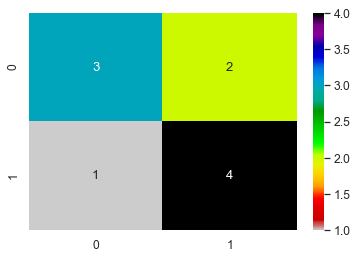

In [125]:
import pandas as pd
import seaborn as sns

confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

# Similarity Analysis

### Loading the Language Model and Creating a spaCy Doc

In [10]:
import spacy

# nlp = spacy.load('en')  
nlp = spacy.load('en_core_web_lg') 

In [20]:
# get filenames in txt and movie subdirectories
parasite_file = glob.glob("*/Parasite/*.txt", recursive=True)
joker_file = glob.glob("*/Joker/*.txt", recursive=True)
print(f'Num. Parasite Files Analyzed: {len(parasite_file)}')
print(f'Num. Joker Files Analyzed: {len(joker_file)}')

pnum_files = len(parasite_file)
jnum_files = len(joker_file)

print(parasite_file)
print(joker_file)

Num. Parasite Files Analyzed: 5
Num. Joker Files Analyzed: 6
['txt/Parasite/1001_Movies_Positive.txt', 'txt/Parasite/Reel_Views_Positive.txt', 'txt/Parasite/NY_Times_Positive.txt', 'txt/Parasite/Sight_Sound_Slightly_Positive.txt', 'txt/Parasite/Roger_Ebert_Positive.txt']
['txt/Joker/Roger_Ebert_Slightly_Negative.txt', 'txt/Joker/1001_Movies_Positive.txt', 'txt/Joker/Reel_Views_Positive.txt', 'txt/Joker/NY_Times_Negative.txt', 'txt/Joker/SF_Examiner_Positive.txt', 'txt/Joker/Sight_Sound_Positive.txt']


In [12]:
from pathlib import Path

In [13]:
document1 = nlp(Path(parasite_file[0]).read_text())
document2 = nlp(Path(joker_file[0]).read_text())
document1.similarity(document2)

0.9811083940589308

In [24]:
for i in range(0,pnum_files):
    for j in range(0,jnum_files):
        document1 = nlp(Path(parasite_file[i]).read_text())
        document2 = nlp(Path(joker_file[j]).read_text())
        print(f'i={i}, j={j}')
        print(f'{parasite_file[i]} vs {joker_file[j]}, Similarity: {document1.similarity(document2):.3f}%\n')

i=0, j=0
txt/Parasite/1001_Movies_Positive.txt vs txt/Joker/Roger_Ebert_Slightly_Negative.txt, Similarity: 0.981%

i=0, j=1
txt/Parasite/1001_Movies_Positive.txt vs txt/Joker/1001_Movies_Positive.txt, Similarity: 0.990%

i=0, j=2
txt/Parasite/1001_Movies_Positive.txt vs txt/Joker/Reel_Views_Positive.txt, Similarity: 0.976%

i=0, j=3
txt/Parasite/1001_Movies_Positive.txt vs txt/Joker/NY_Times_Negative.txt, Similarity: 0.978%

i=0, j=4
txt/Parasite/1001_Movies_Positive.txt vs txt/Joker/SF_Examiner_Positive.txt, Similarity: 0.964%

i=0, j=5
txt/Parasite/1001_Movies_Positive.txt vs txt/Joker/Sight_Sound_Positive.txt, Similarity: 0.972%

i=1, j=0
txt/Parasite/Reel_Views_Positive.txt vs txt/Joker/Roger_Ebert_Slightly_Negative.txt, Similarity: 0.984%

i=1, j=1
txt/Parasite/Reel_Views_Positive.txt vs txt/Joker/1001_Movies_Positive.txt, Similarity: 0.980%

i=1, j=2
txt/Parasite/Reel_Views_Positive.txt vs txt/Joker/Reel_Views_Positive.txt, Similarity: 0.989%

i=1, j=3
txt/Parasite/Reel_Views_Pos

# Conclusion

Both Sentiment and Similarity analysis __need 'learning'__ to improve analysis. <br>
<br>
Several Joker Movie Reviews were slightly negative or negative; however, the sensetivity analysis resulted in a 'Positive' sentiment for the review, which was not accurate. <br>
<br>
The same was true for Similarity analysis. When comparing reviews from different reviewers and the same reviewer, the analysis estimated that all had a __high__ probability of being similar, which was not true; however, perhaps one can conclude that professional movie critics write similarly.

# In Depth Example - Roger Ebert

### One Parasite Movie Review

In [121]:
from textblob import TextBlob

with open('txt/Parasite/Roger_Ebert.txt','r') as text:
    review = text.read()

blob = TextBlob(review)

blob

TextBlob("Reviewer: Roger Ebert.

Family is everything in Bong Joon-ho’s “Parasite,” a satire that pulls a series of sharp comic switcheroos for an unexpectedly poignant social comment. Bong’s “Okja” competed for the Palme for the first time in 2017, and he is well known internationally for thrillers including “Snowpiercer” and “The Host.” 

The unemployed Kim family of four lives in a basement apartment, where they gleefully poach on a neighbor’s Wifi and make a little cash doing piecework assembling pizza cartons for a chain. A passing nod to the triangular stink bugs that infest their cramped fetid home will take on a meaning that will eventually cast a symbolic shadow in Boon’s larger scheme of things. 

A posh friend of son Ki-woo, aka Kevin (Choi Woo-shik), shows up mysteriously, gifting him with a big craggy “scholar’s stone” said to bring good fortune, and passing on the connection for a gig to tutor the teen daughter of the wealthy Park family. Sister Ki-jung, aka Jessica (Par

# My read on the review was that Roger Ebert was positive

In [122]:
blob.sentences

[Sentence("Reviewer: Roger Ebert."),
 Sentence("Family is everything in Bong Joon-ho’s “Parasite,” a satire that pulls a series of sharp comic switcheroos for an unexpectedly poignant social comment."),
 Sentence("Bong’s “Okja” competed for the Palme for the first time in 2017, and he is well known internationally for thrillers including “Snowpiercer” and “The Host.” 
 
 The unemployed Kim family of four lives in a basement apartment, where they gleefully poach on a neighbor’s Wifi and make a little cash doing piecework assembling pizza cartons for a chain."),
 Sentence("A passing nod to the triangular stink bugs that infest their cramped fetid home will take on a meaning that will eventually cast a symbolic shadow in Boon’s larger scheme of things."),
 Sentence("A posh friend of son Ki-woo, aka Kevin (Choi Woo-shik), shows up mysteriously, gifting him with a big craggy “scholar’s stone” said to bring good fortune, and passing on the connection for a gig to tutor the teen daughter of t

In [123]:
blob.sentiment

Sentiment(polarity=0.0965895892725161, subjectivity=0.5528692851863584)

In [124]:
for sentence in blob.sentences:   # analysis by sentence
    print(sentence.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.03958333333333333, subjectivity=0.45416666666666666)
Sentiment(polarity=0.020833333333333332, subjectivity=0.27777777777777773)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.24, subjectivity=0.54)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.75)
Sentiment(polarity=0.1375, subjectivity=0.3666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.04999999999999999, subjectivity=0.75)
Sentiment(polarity=0.11221590909090909, subjectivity=0.7386363636363636)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.17857142857142858, subjectivity=0.2857142857142857)
Sentiment(polarity=-0.05833333333333335, subjectivity=0.6944444444444443)
Sentiment(polarity=0.5166666666666666, subjectivity=0.9166666666666667)
Sentiment(polarity=-0.016666666666666663, subjectivity=0.19166666666666665)
Sentiment(polarity=0.6,

# Alt Sensitivity Analysis

In [125]:
from textblob.sentiments import NaiveBayesAnalyzer

blob = TextBlob(review, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=1.0, p_neg=2.9661571002312763e-19)

In [126]:
blob = TextBlob(review, analyzer=NaiveBayesAnalyzer())

In [127]:
blob.sentiment

Sentiment(classification='pos', p_pos=1.0, p_neg=2.9661571002312763e-19)

In [128]:
for sentence in blob.sentences:
    print(sentence.sentiment)

Sentiment(classification='neg', p_pos=0.3006329113924054, p_neg=0.6993670886075953)
Sentiment(classification='pos', p_pos=0.9966130714798019, p_neg=0.003386928520196439)
Sentiment(classification='pos', p_pos=0.9999251423832982, p_neg=7.485761669894754e-05)
Sentiment(classification='pos', p_pos=0.9669015616777374, p_neg=0.03309843832226073)
Sentiment(classification='pos', p_pos=0.9984286837804589, p_neg=0.0015713162195443943)
Sentiment(classification='pos', p_pos=0.5038913934685341, p_neg=0.4961086065314636)
Sentiment(classification='pos', p_pos=0.6046869548705573, p_neg=0.3953130451294407)
Sentiment(classification='pos', p_pos=0.8936475056010803, p_neg=0.10635249439891564)
Sentiment(classification='pos', p_pos=0.8786608286441256, p_neg=0.12133917135587752)
Sentiment(classification='pos', p_pos=0.7248690911846424, p_neg=0.2751309088153589)
Sentiment(classification='pos', p_pos=0.9844246724025523, p_neg=0.015575327597448304)
Sentiment(classification='pos', p_pos=0.6922488079624052, p_neg

In [130]:
import spacy

nlp = spacy.load('en') 

In [131]:
document = nlp(review)

In [132]:
for entity in document.ents:
    print(f'{entity.text}: {entity.label_}')

Roger Ebert: PERSON
Bong Joon-ho: GPE
Parasite: ORDINAL
Bong’s “: PERSON
Palme: PERSON
first: ORDINAL
2017: DATE
The Host: WORK_OF_ART
Kim: PERSON
four: CARDINAL
’s Wifi: WORK_OF_ART
Boon: GPE
Ki-woo: PERSON
Kevin: PERSON
Choi Woo-shik: PERSON
’s: ORG
Park: PERSON
Sister Ki-jung: PERSON
Jessica: PERSON
Park So-dam: PERSON
minutes: TIME
Kevin: PERSON
Park: PERSON
Park: PERSON
’s: ORG
Kevin: PERSON
Jessica: PERSON
Park: ORG
Kims: ORG
four: CARDINAL
Parks: PERSON
four: CARDINAL
Park: PERSON
first: ORDINAL
Parks: PERSON
Bong: PERSON
Bong: PERSON
Kims: ORG
Bong: PERSON


# Parasite vs Joker Similarity Analysis for Roger Ebert

### Loading the Language Model and Creating a spaCy Doc

In [133]:
import spacy

nlp = spacy.load('en')  

### Creating the spaCy Docs

In [134]:
from pathlib import Path

document1 = nlp(Path('txt/Parasite/Roger_Ebert.txt').read_text())
document2 = nlp(Path('txt/Joker/Roger_Ebert.txt').read_text())

### Comparing the Review's Similarity 

In [135]:
document1.similarity(document2)

/Users/gosalvez/opt/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.972370561093779

References: <br>
https://medium.com/@martinpella/naive-bayes-for-sentiment-analysis-49b37db18bf8